<a href="https://colab.research.google.com/github/OrTito/vehicle-prices/blob/main/DS_vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

data = pd.read_csv('train-data.csv')
data = data.rename(columns={'Name': 'Company'})
data = data.drop(columns=['Unnamed: 0'])
data.Company = data.Company.str.split(' ').str[0]
data['Mileage'] = data['Mileage'].str.strip(' kmpl km/kg').astype(float)
data['Engine'] = data['Engine'].str.strip(' CC').astype(float)
data['New_Price'] = data['New_Price'].str.strip(' Cr Lakh').astype(float)
data['Power'] = data['Power'].str.strip(' null bhp')
data['Power'] = pd.to_numeric(data['Power'])
data


In [ ]:
## converting non-numeric to numeric

from sklearn import preprocessing

le_Transmission = preprocessing.LabelEncoder()
data.Transmission = le_Transmission.fit_transform(data.Transmission)
keys_Transmission = le_Transmission.classes_
values_Transmission = le_Transmission.transform(le_Transmission.classes_)
dictionary_Transmission = dict(zip(keys_Transmission, values_Transmission))
print(dictionary_Transmission)

le_Location = preprocessing.LabelEncoder()
data.Location = le_Location.fit_transform(data.Location)
keys_Location = le_Location.classes_
values_Location = le_Location.transform(le_Location.classes_)
dictionary_Location = dict(zip(keys_Location, values_Location))
print(dictionary_Location)

le_Fuel_Type = preprocessing.LabelEncoder()
data.Fuel_Type = le_Fuel_Type.fit_transform(data.Fuel_Type)
keys_Fuel_Type = le_Fuel_Type.classes_
values_Fuel_Type = le_Fuel_Type.transform(le_Fuel_Type.classes_)
dictionary_Fuel_Type = dict(zip(keys_Fuel_Type, values_Fuel_Type))
print(dictionary_Fuel_Type)

le_Owner_Type = preprocessing.LabelEncoder()
data.Owner_Type = le_Owner_Type.fit_transform(data.Owner_Type)
keys_Owner_Type = le_Owner_Type.classes_
values_Owner_Type = le_Owner_Type.transform(le_Owner_Type.classes_)
dictionary_Owner_Type = dict(zip(keys_Owner_Type, values_Owner_Type))
print(dictionary_Owner_Type)

le_Company = preprocessing.LabelEncoder()
data.Company = le_Company.fit_transform(data.Company)
keys_Company = le_Company.classes_
values_Company = le_Company.transform(le_Company.classes_)
dictionary_Company = dict(zip(keys_Company, values_Company))
print(dictionary_Company)

In [ ]:
## Removing outliers

data.Kilometers_Driven = data.Kilometers_Driven[data.Kilometers_Driven < 150000]
data.Mileage = data.Mileage[data.Mileage > 5]
data.Engine = data.Engine[data.Engine < 3400]
data.Power = data.Power[data.Power < 275]
data.Seats = data.Seats[data.Seats >= 2]

In [ ]:
## Dropping 'New_Price' and filling NaN values

data = data.drop(columns=['New_Price'])
data.Kilometers_Driven = data.Kilometers_Driven.fillna(data.Kilometers_Driven.median())
data.Mileage = data.Mileage.fillna(data.Mileage.median())
data.Engine = data.Engine.fillna(data.Engine.median())
data.Power = data.Power.fillna(data.Power.median())
data.Seats = data.Seats.fillna(data.Seats.median())
data

In [ ]:
## Company graphs

P_Company = data['Company'].isnull().sum() / len(data['Company'])
labels_Company = 'Missing values', 'Values'
sizes_Company = [P_Company * 100, (1-P_Company) * 100]
explode_Company = (0.25, 0)
fig_Company, ax_Company = plt.subplots()
ax_Company.pie(sizes_Company, explode=explode_Company, labels=labels_Company, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Company.axis('equal')
plt.show()

data['Company'].value_counts().plot.pie()
plt.show()

plt.xlabel('Company Number')
plt.ylabel('publications ')
plt.title('Company')
plt.hist(data['Company'],bins=(50))
plt.show()

print(data['Company'].value_counts())

In [ ]:
## Location graphs

P_Location = data['Location'].isnull().sum() / len(data['Location'])
labels_Location = 'Missing values', 'Values'
sizes_Location = [P_Location * 100, (1-P_Location) * 100]
explode_Location = (0.25, 0)
fig_Location, ax_Location = plt.subplots()
ax_Location.pie(sizes_Location, explode=explode_Location, labels=labels_Location, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Location.axis('equal')
plt.show()

data['Location'].value_counts().plot.pie()
plt.show()

plt.xlabel('Location Number')
plt.ylabel('publications ')
plt.title('Location')
plt.hist(data['Location'],bins=(50))
plt.show()

print(data['Location'].value_counts())

In [ ]:
## Year graphs

P_Year = data['Year'].isnull().sum() / len(data['Year'])
labels_Year = 'Missing values', 'Values'
sizes_Year = [P_Year * 100, (1-P_Year) * 100]
explode_Year = (0.25, 0)
fig_Year, ax_Year = plt.subplots()
ax_Year.pie(sizes_Year, explode=explode_Year, labels=labels_Year, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Year.axis('equal')
plt.show()

plt.xlabel('year')
plt.ylabel('publications ')
plt.title('Year')
plt.hist(data['Year'],bins=(50))
plt.show()

pd.DataFrame(data['Year']).boxplot()
plt.show()
print(data['Year'].describe())

In [ ]:
## Kilometers_Driven graphs

P_Kilometers_Driven = data['Kilometers_Driven'].isnull().sum() / len(data['Kilometers_Driven'])
labels_Kilometers_Driven = 'Missing values', 'Values'
sizes_Kilometers_Driven = [P_Kilometers_Driven * 100, (1-P_Kilometers_Driven) * 100]
explode_Kilometers_Driven = (0.5, 0)
fig_Kilometers_Driven, ax_Kilometers_Driven = plt.subplots()
ax_Kilometers_Driven.pie(sizes_Kilometers_Driven, explode=explode_Kilometers_Driven, labels=labels_Kilometers_Driven, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Kilometers_Driven.axis('equal')
plt.show()

plt.xlabel('Kilometers driven [km]')
plt.ylabel('publications')
plt.title('Kilometers_Driven')
plt.hist(data['Kilometers_Driven'],bins=50)
plt.show()

pd.DataFrame(data['Kilometers_Driven']).boxplot()
plt.show()
print(data['Kilometers_Driven'].describe())

In [ ]:
## Fuel_Type graphs

P_Fuel_Type = data['Fuel_Type'].isnull().sum() / len(data['Fuel_Type'])
labels_Fuel_Type = 'Missing values', 'Values'
sizes_Fuel_Type = [P_Fuel_Type * 100, (1-P_Fuel_Type) * 100]
explode_Fuel_Type = (0.25, 0)
fig_Fuel_Type, ax_Fuel_Type = plt.subplots()
ax_Fuel_Type.pie(sizes_Fuel_Type, explode=explode_Fuel_Type, labels=labels_Fuel_Type, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Fuel_Type.axis('equal')
plt.show()

data['Fuel_Type'].value_counts().plot.pie()
plt.show()

plt.xlabel('Fuel_Type Number')
plt.ylabel('publications ')
plt.title('Fuel_Type')
plt.hist(data['Fuel_Type'],bins=(50))
plt.show()

print(data['Fuel_Type'].value_counts())

In [ ]:
## Transmission graphs

P_Transmission = data['Transmission'].isnull().sum() / len(data['Transmission'])
labels_Transmission = 'Missing values', 'Values'
sizes_Transmission = [P_Transmission * 100, (1-P_Transmission) * 100]
explode_Transmission = (0.25, 0)
fig_Transmission, ax_Transmission = plt.subplots()
ax_Transmission.pie(sizes_Transmission, explode=explode_Transmission, labels=labels_Transmission, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Transmission.axis('equal')
plt.show()

data['Transmission'].value_counts().plot.pie()
plt.show()

plt.xlabel('Transmission Number')
plt.ylabel('publications ')
plt.title('Transmission')
plt.hist(data['Transmission'],bins=(50))
plt.show()

print(data['Transmission'].value_counts())

In [ ]:
## Owner_Type graphs

P_Owner_Type = data['Owner_Type'].isnull().sum() / len(data['Owner_Type'])
labels_Owner_Type = 'Missing values', 'Values'
sizes_Owner_Type = [P_Owner_Type * 100, (1-P_Owner_Type) * 100]
explode_Owner_Type = (0.25, 0)
fig_Owner_Type, ax_Owner_Type = plt.subplots()
ax_Owner_Type.pie(sizes_Owner_Type, explode=explode_Owner_Type, labels=labels_Owner_Type, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Owner_Type.axis('equal')
plt.show()

data['Owner_Type'].value_counts().plot.pie()
plt.show()

plt.xlabel('Owner_Type Number')
plt.ylabel('publications ')
plt.title('Owner_Type')
plt.hist(data['Owner_Type'],bins=(50))
plt.show()

print(data['Owner_Type'].value_counts())

In [ ]:
## Mileage graphs

P_Mileage = data['Mileage'].isnull().sum() / len(data['Mileage'])
labels_Mileage = 'Missing values', 'Values'
sizes_Mileage = [P_Mileage * 100, (1-P_Mileage) * 100]
explode_Mileage = (0.25, 0)
fig_Mileage, ax_Mileage = plt.subplots()
ax_Mileage.pie(sizes_Mileage, explode=explode_Mileage, labels=labels_Mileage, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Mileage.axis('equal')
plt.show()

plt.xlabel('mileage [kmpl]')
plt.ylabel('publications')
plt.title('Mileage')
plt.hist(data['Mileage'],bins=50)
plt.show()

pd.DataFrame(data['Mileage']).boxplot()
plt.show()
print(data['Mileage'].describe())

In [ ]:
## Engine graphs

P_Engine = data['Engine'].isnull().sum() / len(data['Engine'])
labels_Engine = 'Missing values', 'Values'
sizes_Engine = [P_Engine * 100, (1-P_Engine) * 100]
explode_Engine = (0.5, 0)
fig_Engine, ax_Engine = plt.subplots()
ax_Engine.pie(sizes_Engine, explode=explode_Engine, labels=labels_Engine, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Engine.axis('equal')
plt.show()

plt.xlabel('engine [CC]')
plt.ylabel('publications')
plt.title('Engine')
plt.hist(data['Engine'],bins=50)
plt.show()

pd.DataFrame(data['Engine']).boxplot()
plt.show()
print(data['Engine'].describe())

In [ ]:
## Power graphs

P_Power = data['Power'].isnull().sum() / len(data['Power'])
labels_Power = 'Missing values', 'Values'
sizes_Power = [P_Power * 100, (1-P_Power) * 100]
explode_Power = (0.5, 0)
fig_Power, ax_Power = plt.subplots()
ax_Power.pie(sizes_Power, explode=explode_Power, labels=labels_Power, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Power.axis('equal')
plt.show()

plt.xlabel('power [bhp]')
plt.ylabel('publications')
plt.title('Power')
plt.hist(data['Power'],bins=100)
plt.show()

pd.DataFrame(data['Power']).boxplot()
plt.show()
print(data['Power'].describe())

In [ ]:
## Seats graphs

P_Seats = data['Seats'].isnull().sum() / len(data['Seats'])
labels_Seats = 'Missing values', 'Values'
sizes_Seats = [P_Seats * 100, (1-P_Seats) * 100]
explode_Seats = (0.5, 0)
fig_Seats, ax_Seats = plt.subplots()
ax_Seats.pie(sizes_Seats, explode=explode_Seats, labels=labels_Seats, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Seats.axis('equal')
plt.show()

plt.xlabel('seats')
plt.ylabel('publications')
plt.title('Seats')
plt.hist(data['Seats'],bins=(50))
plt.show()

pd.DataFrame(data['Seats']).boxplot()
plt.show()
print(data['Seats'].describe())

In [ ]:
## New_Price graphs

P_New_Price = data['New_Price'].isnull().sum() / len(data['New_Price'])
labels_New_Price = 'Missing values', 'Values'
sizes_New_Price = [P_New_Price * 100, (1-P_New_Price) * 100]
explode_New_Price = (0.25, 0)
fig_New_Price, ax_New_Price = plt.subplots()
ax_New_Price.pie(sizes_New_Price, explode=explode_New_Price, labels=labels_New_Price, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_New_Price.axis('equal')
plt.show()

plt.xlabel('new price [k$]')
plt.ylabel('publications')
plt.title('New_Price')
plt.hist(data['New_Price'],bins=50)
plt.show()

pd.DataFrame(data['New_Price']).boxplot()
plt.show()

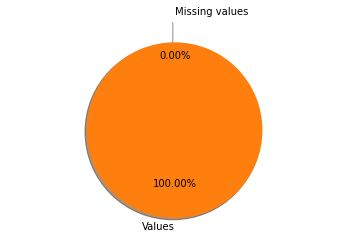

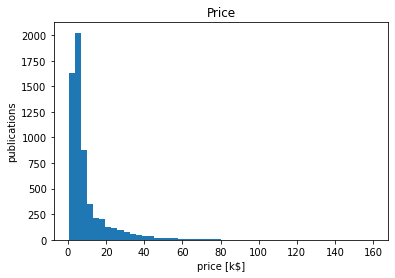

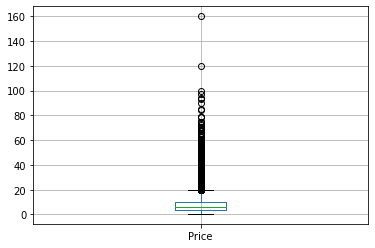

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64


In [ ]:
## Price graphs

P_Price = data['Price'].isnull().sum() / len(data['Price'])
labels_Price = 'Missing values', 'Values'
sizes_Price = [P_Price * 100, (1-P_Price) * 100]
explode_Price = (0.25, 0)
fig_Price, ax_Price = plt.subplots()
ax_Price.pie(sizes_Price, explode=explode_Price, labels=labels_Price, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax_Price.axis('equal')
plt.show()

plt.xlabel('price [k$]')
plt.ylabel('publications')
plt.title('Price')
plt.hist(data['Price'],bins=50)
plt.show()

pd.DataFrame(data['Price']).boxplot()
plt.show()
print(data['Price'].describe())

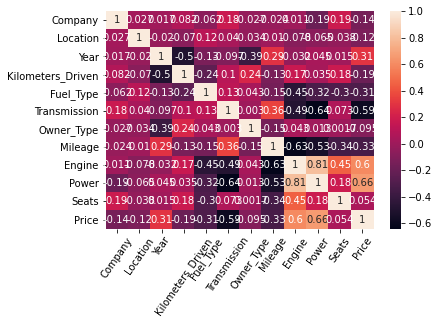

In [ ]:
## Correlation Matrix

Corr = data.corr()
sn.heatmap(Corr, annot=True)
plt.xticks(rotation=55)
plt.show()

In [ ]:
## Splitting the data into train set and test set

from sklearn.model_selection import train_test_split
X, y = data.drop('Price', axis=1), data.Price
train_test_ratio = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_ratio, random_state=2, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4514, 11), (4514,), (1505, 11), (1505,))

In [ ]:
## LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

LR_Regressor = LinearRegression()
LR_Regressor.fit(X_train, y_train)
y_pred_LR_train = LR_Regressor.predict(X_train)
y_pred_LR_test = LR_Regressor.predict(X_test)
print('train MAE: {}'.format(mean_absolute_error(y_train, y_pred_LR_train)))
print('test MAE: {}'.format(mean_absolute_error(y_test, y_pred_LR_test)))

p = 0
for i in range(len(y_pred_LR_test)):
  if y_pred_LR_test[i] < 0:
    p = p + 1
print('number of negative values: {}'.format(p))
predTest = pd.DataFrame(y_pred_LR_test, columns = ['predictions'])
print(predTest.describe())




train MAE: 4.069718617801256
test MAE: 3.955130039827295
number of negative values: 150
       predictions
count  1505.000000
mean      9.115340
std       8.539069
min     -13.841334
25%       3.388537
50%       7.303078
75%      13.439207
max      37.964785


In [ ]:
## DecisionTreeRegressor
## hold-out

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

DT_Regressor = DecisionTreeRegressor(max_depth=8, random_state=2)
DT_Regressor.fit(X_train, y_train)
y_pred_DT_train = DT_Regressor.predict(X_train)
y_pred_DT_test = DT_Regressor.predict(X_test)
print('train MAE: {}'.format(mean_absolute_error(y_train, y_pred_DT_train)))
print('test MAE: {}'.format(mean_absolute_error(y_test, y_pred_DT_test)))

pred_DT_Test = pd.DataFrame(y_pred_DT_test, columns = ['predictions'])
print(pred_DT_Test.describe())




train MAE: 1.6600269141344424
test MAE: 2.33476705877225
       predictions
count  1505.000000
mean      9.221824
std      10.573216
min       1.392389
25%       3.496829
50%       5.697917
75%       9.492031
max      97.070000


In [ ]:
## 10-fold cross validation

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, make_scorer

scorer = make_scorer(mean_absolute_error)
kfold_DT = cross_validate(estimator = DT_Regressor, X = data.drop(columns=['Price']), y = data['Price'], cv = 10, scoring = scorer, return_train_score=True)

print(kfold_DT)
print('mean train MAE: {}'.format(kfold_DT['train_score'].mean()))
print('mean test MAE: {}'.format(kfold_DT['test_score'].mean()))


{'fit_time': array([0.02096057, 0.01630092, 0.01639652, 0.01588869, 0.01585507,
       0.01583457, 0.0157702 , 0.01588082, 0.01596975, 0.01595569]), 'score_time': array([0.00142193, 0.00165391, 0.00139713, 0.00140524, 0.00136065,
       0.00136566, 0.0013504 , 0.00132823, 0.00136709, 0.0013597 ]), 'test_score': array([2.79866949, 2.40632422, 2.44625681, 2.75174615, 1.96824743,
       2.41267541, 2.25866508, 2.25154173, 2.34675558, 2.28152416]), 'train_score': array([1.74788882, 1.72751895, 1.72550677, 1.71784638, 1.77462276,
       1.7261215 , 1.74810673, 1.74981089, 1.78105277, 1.5807962 ])}
mean train MAE: 1.727927177395788
mean test MAE: 2.3922406056048326


In [ ]:
## Leave-One-Out Cross-Validation
import time

start_time = time.time()
LOOCV_DT = cross_validate(estimator = DT_Regressor, X = data.drop(columns=['Price']), y = data['Price'], cv = data.shape[0], scoring = scorer, return_train_score=True)
print(LOOCV_DT)
print('mean train MAE: {}'.format(LOOCV_DT['train_score'].mean()))
print('mean test MAE: {}'.format(LOOCV_DT['test_score'].mean()))
print("--- %s seconds ---" % (time.time() - start_time))

{'fit_time': array([0.02257419, 0.01864457, 0.01980138, ..., 0.01757669, 0.0174644 ,
       0.01776791]), 'score_time': array([0.00187206, 0.00172877, 0.00171542, ..., 0.00130987, 0.00135303,
       0.0013206 ]), 'test_score': array([0.77747768, 3.804375  , 0.06024809, ..., 3.4555914 , 0.44050193,
       0.59079151]), 'train_score': array([1.74691568, 1.74631801, 1.74700943, ..., 1.74647025, 1.74695486,
       1.74693253])}
mean train MAE: 1.7468023197407705
mean test MAE: 2.382064325928493
--- 130.37588453292847 seconds ---


In [ ]:
## RandomForestRegressor
## hold-out

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

RF_Regressor = RandomForestRegressor(n_estimators=20)
RF_Regressor.fit(X_train, y_train)
y_pred_RF_train = RF_Regressor.predict(X_train)
y_pred_RF_test = RF_Regressor.predict(X_test)
print('train MAE: {}'.format(mean_absolute_error(y_train, y_pred_RF_train)))
print('test MAE: {}'.format(mean_absolute_error(y_test, y_pred_RF_test)))

pred_RF_Test = pd.DataFrame(y_pred_RF_test, columns = ['predictions'])
print(pred_RF_Test.describe())


train MAE: 0.6271280128489145
test MAE: 1.666651079734219
       predictions
count  1505.000000
mean      9.301120
std      10.418712
min       0.527000
25%       3.656000
50%       5.595000
75%       9.717500
max      81.876000


In [ ]:
## 10-fold cross validation

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, make_scorer

scorer = make_scorer(mean_absolute_error)
kfold_RF = cross_validate(estimator = RF_Regressor, X = data.drop(columns=['Price']), y = data['Price'], cv = 10, scoring = scorer, return_train_score=True)

print(kfold_RF)
print('mean train MAE: {}'.format(kfold_RF['train_score'].mean()))
print('mean test MAE: {}'.format(kfold_RF['test_score'].mean()))

{'fit_time': array([0.44645762, 0.4317143 , 0.42312765, 0.43220139, 0.41856313,
       0.43908262, 0.42538857, 0.45265365, 0.43005633, 0.42491174]), 'score_time': array([0.00736976, 0.00708342, 0.00848579, 0.0073247 , 0.00731087,
       0.00730205, 0.00730729, 0.00776601, 0.0073781 , 0.00721622]), 'test_score': array([1.73138199, 1.43100395, 1.56002976, 1.80163858, 1.42783929,
       1.55592679, 1.46963815, 1.56048339, 1.56125317, 1.70807725]), 'train_score': array([0.61330351, 0.60148344, 0.60074104, 0.61300716, 0.63862067,
       0.62412191, 0.62329777, 0.60792007, 0.61886159, 0.60117645])}
mean train MAE: 0.614253359760503
mean test MAE: 1.5807272306373312


In [ ]:
## Leave-One-Out Cross-Validation

import time

start_time = time.time()
LOOCV_RF = cross_validate(estimator = RF_Regressor, X = data.drop(columns=['Price']), y = data['Price'], cv = data.shape[0], scoring = scorer, return_train_score=True)
print(LOOCV_DT)
print('mean train MAE: {}'.format(LOOCV_RF['train_score'].mean()))
print('mean test MAE: {}'.format(LOOCV_RF['test_score'].mean()))
print("--- %s seconds ---" % (time.time() - start_time))

{'fit_time': array([0.02257419, 0.01864457, 0.01980138, ..., 0.01757669, 0.0174644 ,
       0.01776791]), 'score_time': array([0.00187206, 0.00172877, 0.00171542, ..., 0.00130987, 0.00135303,
       0.0013206 ]), 'test_score': array([0.77747768, 3.804375  , 0.06024809, ..., 3.4555914 , 0.44050193,
       0.59079151]), 'train_score': array([1.74691568, 1.74631801, 1.74700943, ..., 1.74647025, 1.74695486,
       1.74693253])}
mean train MAE: 0.6004807659003726
mean test MAE: 1.5313147639617402
--- 3035.656644821167 seconds ---
